In [1]:
#Import dependencies
#%matplotlib inline
import os
import requests
import json
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key
import matplotlib.pyplot as plt

In [2]:
results_path = os.path.join("Resources", "Houston_data.csv")
Houston_df = pd.read_csv(results_path)
Houston_df.head()

,Month,Year,Tot Claims
0,January,2019,150264
1,February,2019,135643
2,March,2019,127436
3,April,2019,110554
4,May,2019,115222


In [3]:
results_path = os.path.join("Resources", "Men_unemployed.csv")
Men_df = pd.read_csv(results_path)
Men_df.head()

,Month,Year,% M Unempl
0,January,2019,3.7
1,February,2019,3.5
2,March,2019,3.6
3,April,2019,3.4
4,May,2019,3.4


In [4]:
results_path = os.path.join("Resources", "Women_unemployed.csv")
Women_df = pd.read_csv(results_path)
Women_df.head()

,Month,Year,% F Unempl
0,January,2019,3.6
1,February,2019,3.4
2,March,2019,3.3
3,April,2019,3.1
4,May,2019,3.3


In [5]:
results_path = os.path.join("Resources", "Teen_unemplyed.csv")
Teen_df = pd.read_csv(results_path)
Teen_df.head()

,Month,Year,% Teen Unempl
0,January,2019,12.9
1,February,2019,13.3
2,March,2019,12.7
3,April,2019,12.9
4,May,2019,12.6


In [6]:
GenderDF = pd.merge(Men_df,Women_df, how="left",on=["Year","Month"])
# GenderDF.rename(columns = {"Year_x":"Year"}, inplace = True)
GenderDF = GenderDF
#.set_index("Year")
GenderDF

,Month,Year,% M Unempl,% F Unempl
0,January,2019,3.7,3.6
1,February,2019,3.5,3.4
2,March,2019,3.6,3.3
3,April,2019,3.4,3.1
4,May,2019,3.4,3.3
5,June,2019,3.3,3.3
6,July,2019,3.3,3.3
7,August,2019,3.3,3.3
8,September,2019,3.2,3.1
9,October,2019,3.2,3.2


In [7]:
#Export dataframe to csv output file
output_file = os.path.join("Output_data","gender.csv")
GenderDF.to_csv(output_file, index=False, header=True)

In [8]:
Total_TeenDF = pd.merge(Teen_df,Houston_df,how="left",on=["Year","Month"])
Total_TeenDF.rename(columns = {"Year_x":"Year"}, inplace = True)
Total_TeenDF = Total_TeenDF
#.set_index("Month")
Total_TeenDF

,Month,Year,% Teen Unempl,Tot Claims
0,January,2019,12.9,150264.0
1,February,2019,13.3,135643.0
2,March,2019,12.7,127436.0
3,April,2019,12.9,110554.0
4,May,2019,12.6,115222.0
5,June,2019,12.7,135598.0
6,July,2019,12.7,141120.0
7,August,2019,12.5,138646.0
8,September,2019,12.5,127777.0
9,October,2019,12.3,124867.0


In [9]:
#Export dataframe to csv output file
# output_file = os.path.join("Output_data","Total_Teen.csv")
# Total_TeenDF.to_csv(output_file, index=False, header=True)

In [10]:
#Clean up columns
MergedDF = pd.merge(GenderDF,Total_TeenDF, how="left",on=["Year","Month"])
MergedDF.rename(columns = {"Year_x":"Year"}, inplace = True)
MergedDF["Month"] = MergedDF["Month"].astype("str") 
MergedDF["Year"] = MergedDF["Year"].astype("str") 


MergedDF["MM_YR"]=MergedDF["Month"]+MergedDF["Year"]
MergedDF = MergedDF.set_index("MM_YR")
MergedDF = MergedDF.reset_index()

MergedDF.drop(['Month','Year'], axis=1)


,MM_YR,% M Unempl,% F Unempl,% Teen Unempl,Tot Claims
0,January2019,3.7,3.6,12.9,150264.0
1,February2019,3.5,3.4,13.3,135643.0
2,March2019,3.6,3.3,12.7,127436.0
3,April2019,3.4,3.1,12.9,110554.0
4,May2019,3.4,3.3,12.6,115222.0
5,June2019,3.3,3.3,12.7,135598.0
6,July2019,3.3,3.3,12.7,141120.0
7,August2019,3.3,3.3,12.5,138646.0
8,September2019,3.2,3.1,12.5,127777.0
9,October2019,3.2,3.2,12.3,124867.0


In [11]:
# Reduce to relevant monthly data

# Left list determines month index
reduced_df = MergedDF.iloc[[14,15,16,17,18,19],[1,2,3,4,5,6]]
reduced_df["% Pos"] = reduced_df[["% M Unempl","% F Unempl","% Teen Unempl"]].mean(axis=1)
reduced_df = reduced_df.drop(columns={"Year","Tot Claims"})


reduced_df = reduced_df.rename(columns={"% M Unempl":"per_men_unemp",
                                        "% F Unempl":"per_wom_unemp",
                                        "% Teen Unempl":"per_teen_unemp"})
#Export dataframe to csv output file
output_file = os.path.join("Output_data","Statitistics Unemployment Data.csv")
reduced_df.to_csv(output_file, index=False, header=True)

reduced_df.head()

,Month,per_men_unemp,per_wom_unemp,per_teen_unemp,% Pos
14,March,4.0,4.0,14.3,7.433333
15,April,13.0,15.5,31.9,20.133333
16,May,11.6,13.9,29.9,18.466667
17,June,10.2,11.2,23.2,14.866667
18,July,9.4,10.5,19.3,13.066667


In [12]:
#Export dataframe to csv output file
output_file = os.path.join("Output_data","MF_Teen_unempl.csv")
MergedDF.to_csv(output_file, index=False, header=True)

In [13]:
#Change object types to float
MergedDF.dtypes
MergedDF["% M Unempl"]= MergedDF["% M Unempl"].astype(str).astype(float)
MergedDF["% F Unempl"]= MergedDF["% F Unempl"].astype(str).astype(float)
MergedDF["% Teen Unempl"]= MergedDF["% Teen Unempl"].astype(str).astype(float)
MergedDF["Tot Claims"]= MergedDF["Tot Claims"].astype(str).astype(float)
#MergedDF["MM_YR"]= MergedDF["MM_YR"].astype(str).astype(float)
MergedDF.head()

,MM_YR,Month,Year,% M Unempl,% F Unempl,% Teen Unempl,Tot Claims
0,January2019,January,2019,3.7,3.6,12.9,150264.0
1,February2019,February,2019,3.5,3.4,13.3,135643.0
2,March2019,March,2019,3.6,3.3,12.7,127436.0
3,April2019,April,2019,3.4,3.1,12.9,110554.0
4,May2019,May,2019,3.4,3.3,12.6,115222.0


In [14]:
#Set axis
xaxis = list(MergedDF["MM_YR"])
yaxis = list(MergedDF["% M Unempl"])
yaxis2 = list(MergedDF["% F Unempl"])
yaxis3 = list(MergedDF["% Teen Unempl"])
yaxis4 = list(MergedDF["Tot Claims"])


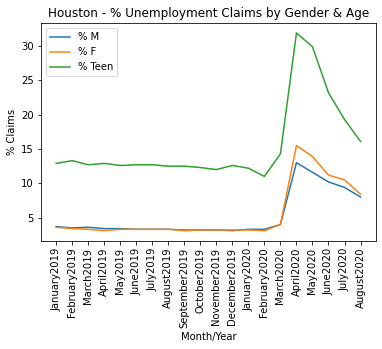

In [15]:
#Plot Hou line chart
plt.plot(xaxis,yaxis)
plt.plot(xaxis,yaxis2)
plt.plot(xaxis,yaxis3)
plt.title("Houston - % Unemployment Claims by Gender & Age")
plt.xlabel("Month/Year")
plt.ylabel("% Claims")
plt.xticks(rotation = 90)
plt.legend(['% M', '% F', "% Teen"], loc=2)
plt.show()

In [16]:

#Create an image of Hou plot
output_path = os.path.join("Images", "Hou_Claims_MFage.png")
plt.savefig(output_path)
plt.show()


<Figure size 432x288 with 0 Axes>

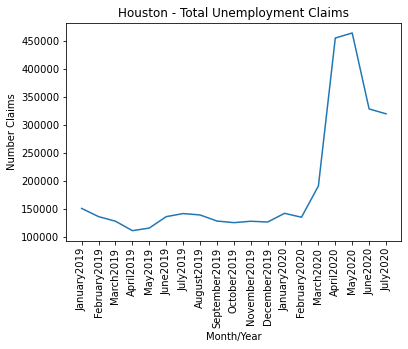

In [17]:

plt.plot(xaxis,yaxis4)
plt.title("Houston - Total Unemployment Claims")
plt.xlabel("Month/Year")
plt.ylabel("Number Claims")
plt.xticks(rotation = 90)
plt.show()


In [22]:

#Create an image of Hou plot
output_path = os.path.join("Images", "Hou_Tot_Claims.png")
plt.savefig(output_path)
plt.show()


<Figure size 432x288 with 0 Axes>

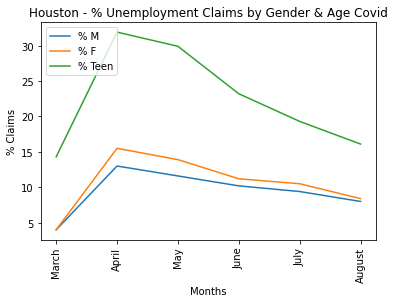

In [19]:

#Set axis
xaxis = list(reduced_df["Month"])
yaxis = list(reduced_df["per_men_unemp"])
yaxis2 = list(reduced_df["per_wom_unemp"])
yaxis3 = list(reduced_df["per_teen_unemp"])
#yaxis4 = list(reduced_df["Tot Claims"])


#Plot Hou line chart
plt.plot(xaxis,yaxis)
plt.plot(xaxis,yaxis2)
plt.plot(xaxis,yaxis3)
plt.title("Houston - % Unemployment Claims by Gender & Age Covid")
plt.xlabel("Months")
plt.ylabel("% Claims")
plt.xticks(rotation = 90)
plt.legend(['% M', '% F', "% Teen"], loc=2)
plt.show()
